# Import library

In [261]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")

# Exploration data analysis

In [2]:
data=pd.read_csv('diabetes.csv') # read data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape # check data shape

(768, 9)

In [4]:
data.isnull().sum() # check null information

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.describe() # check data distribution

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


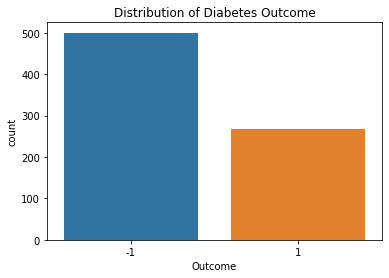

In [230]:
# Countplot for Outcome (diabetes) distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Outcome')
plt.title('Distribution of Diabetes Outcome')
plt.show()

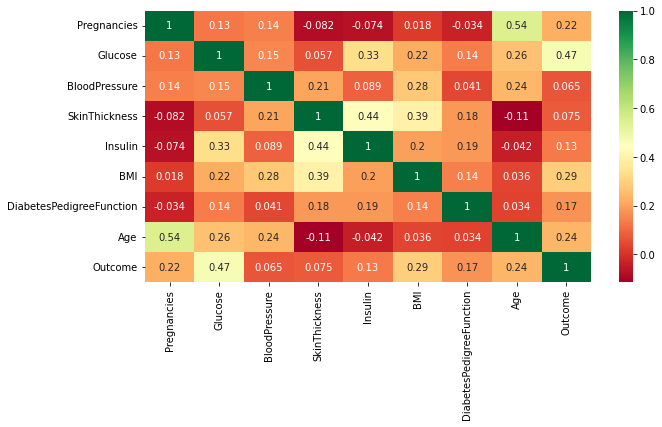

In [231]:
# correlation analysis
corr_mat = data.corr() 

plt.figure(figsize=(10,5))
g=sns.heatmap(corr_mat,annot=True,cmap="RdYlGn")

# Model implemention

In [410]:
class My_Perceptron:
    def __init__(self,alpha=0.85,seed=0, learning_rate=0.01,n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.alpha=alpha
        self.losses = []
        self.accuracies = []
        self.seed=seed

    def fit(self, X, y):
        n_samples, n_features = X.shape
        np.random.seed(self.seed)
        self.weights =np.random.uniform(-1, 1, n_features)
        self.bias = 0

        for iteration in range(self.n_iterations):
            incorrect_samples = 0
            for i in range(n_samples):
                prediction = np.dot(self.weights, X[i]) + self.bias
                if prediction >= 0:
                    y_pred = 1
                else:
                    y_pred = -1

                if y[i] * y_pred <= 0:
                    if self.alpha!=None:
                        if iteration%10==0 and iteration>0:
                            self.learning_rate=self.alpha*self.learning_rate
                            
                   
                    self.weights += self.learning_rate * y[i] * X[i]
                    self.bias += self.learning_rate * y[i]
                    incorrect_samples += 1

            predictions = self.predict(X)
            accuracy =np.mean(predictions==y)
            self.accuracies.append(accuracy)

            loss = incorrect_samples
            self.losses.append(loss)

    def predict(self, X):
        predictions = []
        for i in range(X.shape[0]):
            prediction = np.dot(self.weights, X[i]) + self.bias
            if prediction >= 0:
                predictions.append(1)
            else:
                predictions.append(-1)
        return np.array(predictions)

# Data pre-processing

In [369]:
x=data.drop('Outcome',axis=1).values
y=data['Outcome'].values
y[y==0]=-1
x_train, x_test ,y_train, y_test= train_test_split(x, y,test_size=0.2, random_state =42)
s=StandardScaler()
s.fit(x_train)
x_train=s.transform(x_train)
x_test=s.transform(x_test)

# Learning rate study

Lr=  1


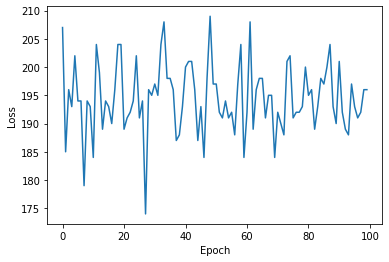

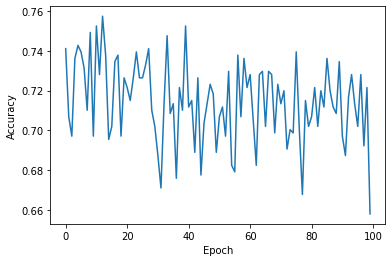

Lr=  0.1


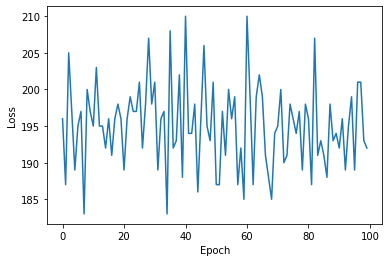

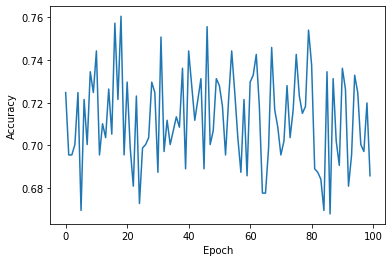

Lr=  0.01


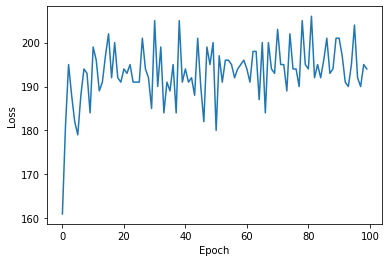

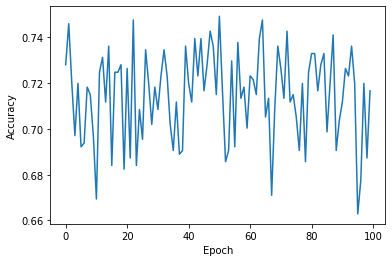

Lr=  0.001


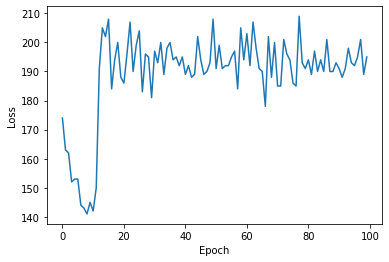

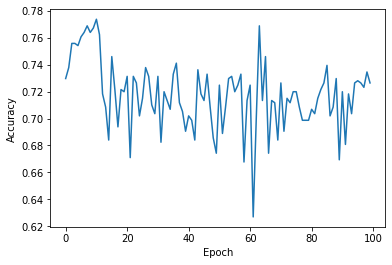

Lr=  0.0001


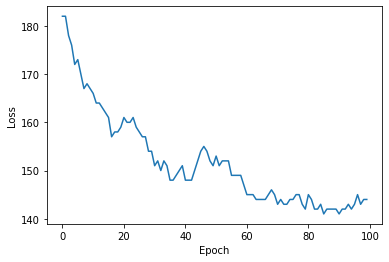

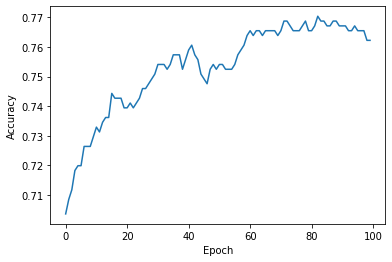

Lr=  1e-05


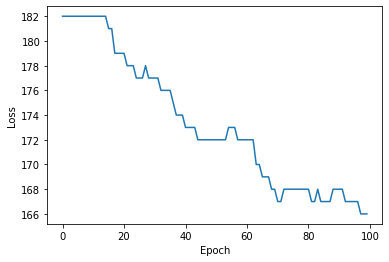

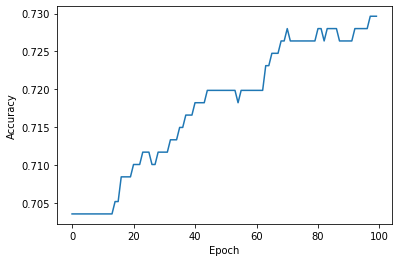

Lr=  1e-06


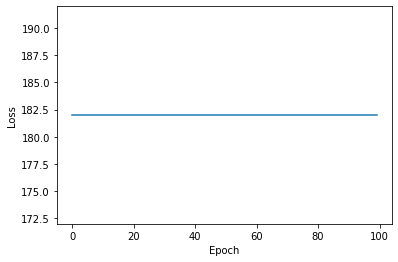

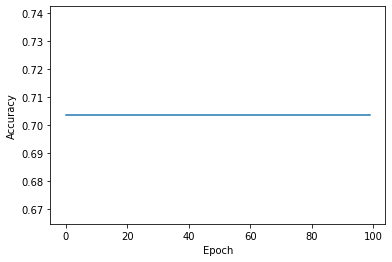

In [357]:


lr=[1,0.1,0.01,0.001,0.0001,1e-5,1e-6]
for l in lr:
    perceptron = My_Perceptron(alpha=None,seed=0,learning_rate=l, n_iterations=100)

    # 训练模型
    perceptron.fit(x_train, y_train)
    
    print('Lr= ',l)
    plt.plot(range(perceptron.n_iterations),perceptron.losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

    plt.plot(range(perceptron.n_iterations),perceptron.accuracies )
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.show()

# Epochs study

Epoch=  10


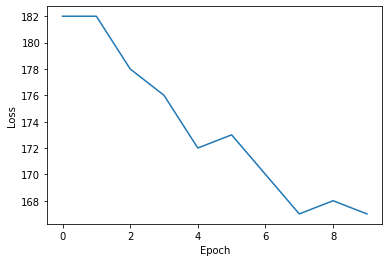

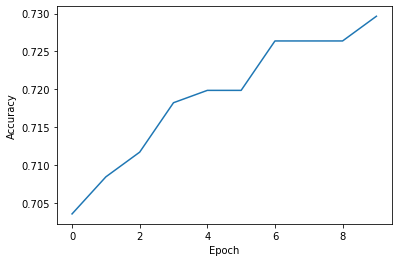

Epoch=  100


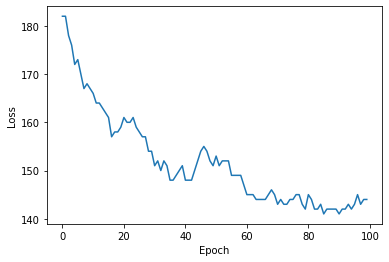

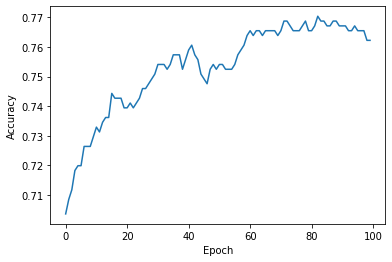

Epoch=  1000


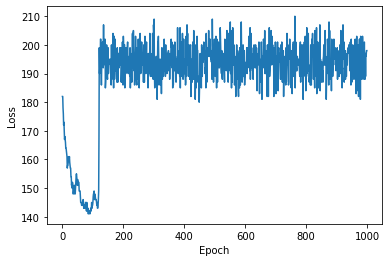

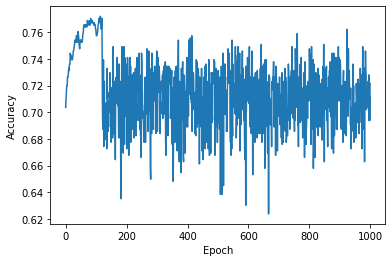

Epoch=  2000


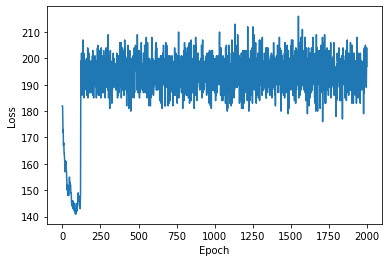

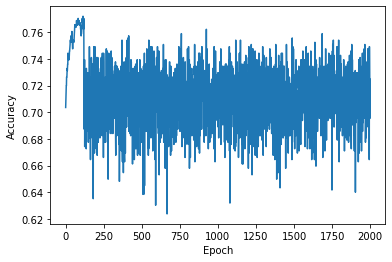

In [359]:
epochs=[10,100,1000,2000]
for epoch in epochs:
    perceptron = My_Perceptron(alpha=None,seed=0,learning_rate=1e-4, n_iterations=epoch)

    # 训练模型
    perceptron.fit(x_train, y_train)
    
    print('Epoch= ',epoch)
    plt.plot(range(perceptron.n_iterations),perceptron.losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

    plt.plot(range(perceptron.n_iterations),perceptron.accuracies )
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.show()

# Attenuation coefficient study

In [419]:
X=data.drop('Outcome',axis=1)
y=data['Outcome']
y[y==0]=-1
s=StandardScaler()
kf = KFold(n_splits=5)
accs1=[]
alphas=[0.1,0.3,0.5,0.7,0.8,0.85,0.9,0.95,1]
for alpha in [0.1,0.3,0.5,0.7,0.8,0.85,0.9,0.95,1]:
    accs=[]
    for train_index, test_index in kf.split(X):
        x_train, x_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index].values, y.iloc[test_index].values
        s.fit(x_train)
        x_train=s.transform(x_train)
        x_test=s.transform(x_test)
        perceptron = My_Perceptron(alpha=alpha,seed=0, learning_rate=1e-3, n_iterations=100)

   
        perceptron.fit(x_train, y_train)
        predictions = perceptron.predict(x_test)

        accs.append(np.mean(predictions==y_test))

    print(np.mean(accs))
    accs1.append(np.mean(accs))

0.7500297088532383
0.7500297088532383
0.748731007554537
0.7526440879382055
0.7552414905356082
0.7617519735166794
0.7591460826754945
0.7591715474068416
0.7123249299719888


Text(0, 0.5, 'Mean accuracy')

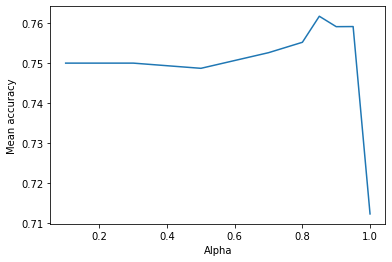

In [420]:
plt.plot(alphas,accs1)
plt.xlabel('Alpha')
plt.ylabel('Mean accuracy')